In [1]:
# The purpose of this is for the visualized figures to be inline the browser
%matplotlib inline

# Import stuff from menpo
import menpo.io as mio
from menpo.feature import no_op, dsift, fast_dsift, double_igo
from menpo.visualize import visualize_images, visualize_pointclouds, print_dynamic, print_progress
from menpo.landmark import labeller, human36M_pose_32, human36M_pose_17

# Import stuff from menpofit
from menpofit.visualize import visualize_shape_model, visualize_fitting_result, plot_ced

# Import stuff from alabortijcv2015 (this will be soon integrated in menpofit)
from alabortijcv2015.aam import PartsAAMBuilder, PartsAAMFitter
from alabortijcv2015.aam.algorithm import SIC, BSC
from alabortijcv2015.utils import pickle_load, pickle_dump
from alabortijcv2015.result import SerializableResult

# Other stuff
import numpy as np
import re
from itertools import islice

save_path = '/vol/atlas/homes/mej114/results'

:0: FutureWarning: IPython widgets are experimental and may change in the future.
/vol/atlas/homes/mej114/yes/envs/menpo/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [78]:
aam=pickle_load(save_path + 'PartsAAM_fast_dsiftHuman3_6M_sitting_2000.pickle')

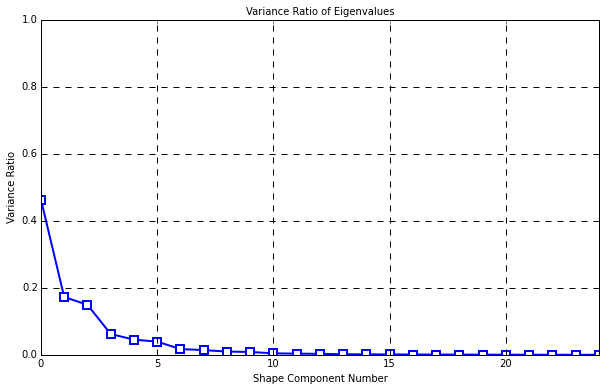

In [79]:
aam.shape_models[1].plot_eigenvalues_ratio_widget()

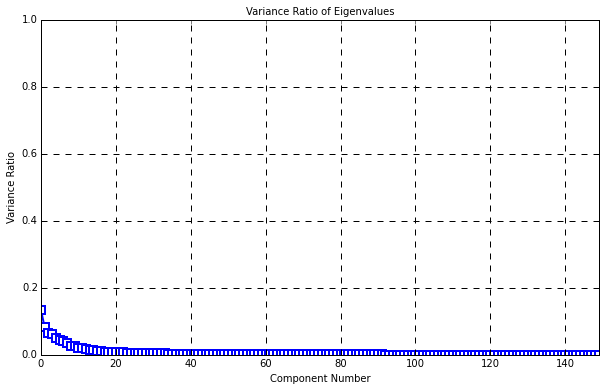

In [114]:
aam.appearance_models[1].plot_eigenvalues_ratio_widget()

In [1]:
noise=['None','0.01','0.02','0.03','0.04','0.05']

In [3]:
file_name=['directions_Human3_6M.pickle','eating_Human3_6M.pickle','sitting_Human3_6M.pickle','Walking_Human3_6M.pickle']

In [2]:
fitter_results=pickle_load(save_path+'PartsAAM_fast_dsift_noise'+noise[0]+file_name[0])
visualize_fitting_result(fitter_results)

NameError: name 'pickle_load' is not defined

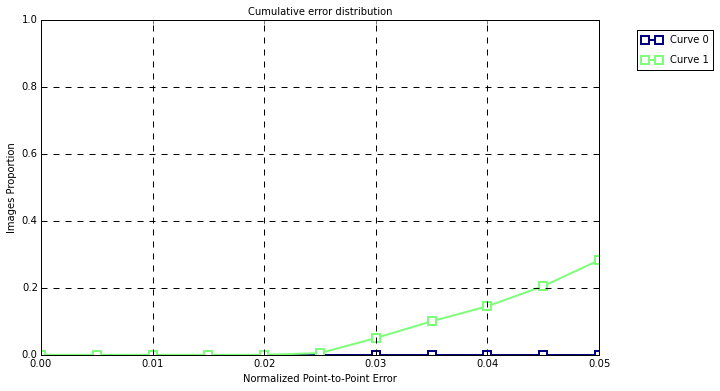

In [7]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results]

plot_ced([initial_errors, final_errors])

In [8]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.1144 | 0.1098 | 0.0364
Fitting result | 0.0729 | 0.0617 | 0.0403


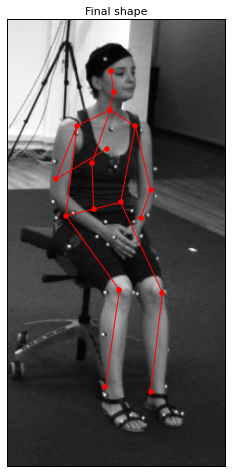

In [9]:
visualize_fitting_result(fitter_results)

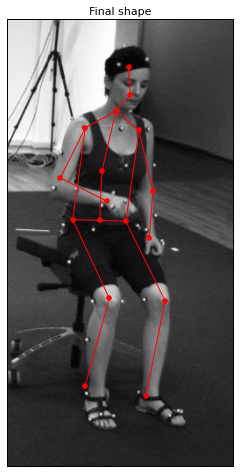

In [113]:
visualize_fitting_result(fitter_results)